# NEO2 Benchmark

This benchmarking effort was suggected by Christopher Albert. He has published a series of NTV calculations done for the ASDEX-Upgrade, and would like to compare the NEO2 approach to the GPEC semi-analytic approach.

Leading physics study goals:

1. Study a magnetic shear term that is always present in the NEO2 calculation, but only present in the SBP of Shaing's analytic formulation (not the bounce resonances).
2. Study the differences between collisionless (NEO2, GPEC), krook (GPEC) and a momentum-conserving (other?) collision opperator.




## Setup

In [1]:
%pylab notebook

import sys
#if '/p/gpec/users/nlogan/gpec' not in sys.path:
#    sys.path.append('/p/gpec/users/nlogan/gpec')
from pypec import data,gpec,post

import seaborn
seaborn.set_palette('colorblind')

Populating the interactive namespace from numpy and matplotlib


/usr/pppl/Anaconda/2.3.0/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


## a10 Equilibrium 

Here we will use a large aspect ratio circular cross section equilibrium similar to the one used to bechmark MARS and PENT in [Wang, et el., Phys. Plasmas, 2014].


### Ideal Calculation

Here, we calculate the ideal MHD perturbed equilibrium and resulting torque.


In [21]:
iroot = '/p/gpec/users/nlogan/data/a10/2016_neo2benchmark/ideal/'
equil = data.open_dataset(iroot + 'idcon_equil.out')
imodb = data.open_dataset(iroot + 'gpec_pmodb_n1.out')
iprof = data.open_dataset(iroot + 'gpec_profile_output_n1.nc')
ipent = data.open_dataset(iroot + 'pentrc_output_n1.nc')
ifgar = data.open_dataset(iroot + 'pentrc_fgar_ell_n1.out')

Casting table 1 into Data object.
Casting table 2 into Data object.
Casting table 1 into Data object.
Casting table 1 into Data object.


The equilibrium looks like so,

<IPython.core.display.Javascript object>


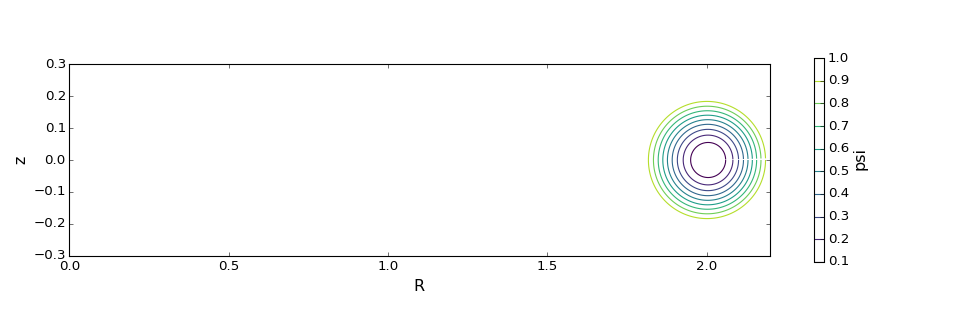

<IPython.core.display.Javascript object>


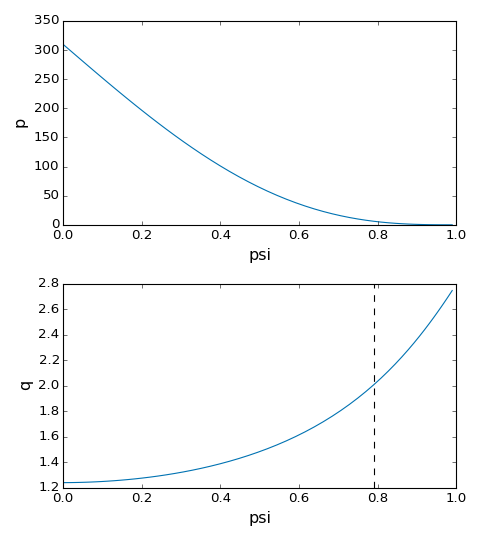

In [11]:
close('all')
f,ax = subplots(figsize=(12,4), subplot_kw={'aspect':'equal'})
im = ax.contour(equil['r'],equil['z'],equil['psi']*(equil['theta']/equil['theta']),levels=linspace(0.1,1,10))
ax.set_xlim(0,2.2)
ax.set_ylim(-0.3,0.3)
ax.set_xlabel('R')
ax.set_ylabel('z')
cb = f.colorbar(im,ax=ax, shrink = 0.7)
cb.set_label('psi')

f,ax = data.plt.subplots(2)
equil['p'].plot(ax=ax[0])
equil['q'].plot(ax=ax[1])
psi_sing = equil['psi'][abs(equil['q']-2).argmin()]
ax[1].axvline(psi_sing, ls='--', c='k')

The perturbations look like so,

<IPython.core.display.Javascript object>


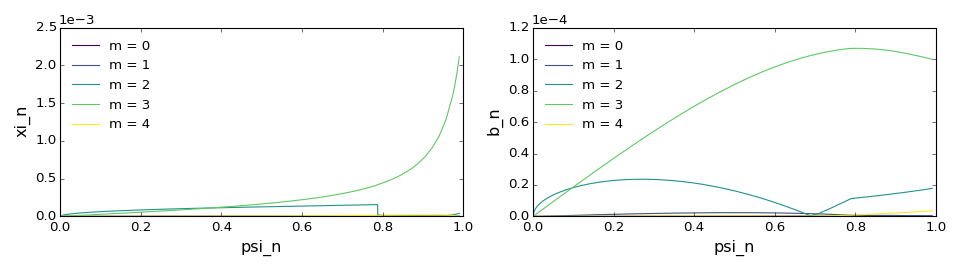

<IPython.core.display.Javascript object>


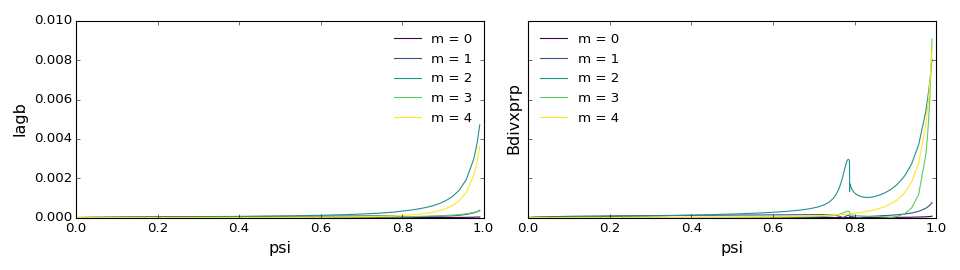

In [33]:
plt.close('all')
f,ax = data.plt.subplots(1,2)
for m in range(0,5):
    np.abs(iprof['xi_n']).sel(m_out=m).plot(ax=ax[0], label='m = {:}'.format(m))
    np.abs(iprof['b_n']).sel(m_out=m).plot(ax=ax[1], label='m = {:}'.format(m))
for a in ax:
    sm = data.plt.set_linearray(a.lines)
    a.legend()
    a.set_title('')

f,ax = data.plt.subplots(1,2, sharey=True)
for m in range(0,5):
    np.abs(imodb['lagb']).sel(m=m).plot(ax=ax[0], label='m = {:}'.format(m))
    np.abs(imodb['Bdivxprp']).sel(m=m).plot(ax=ax[1], label='m = {:}'.format(m))
for a in ax:
    sm = data.plt.set_linearray(a.lines)
    a.legend()
    a.set_title('')



The resulting NTV torque looks like so,

<IPython.core.display.Javascript object>


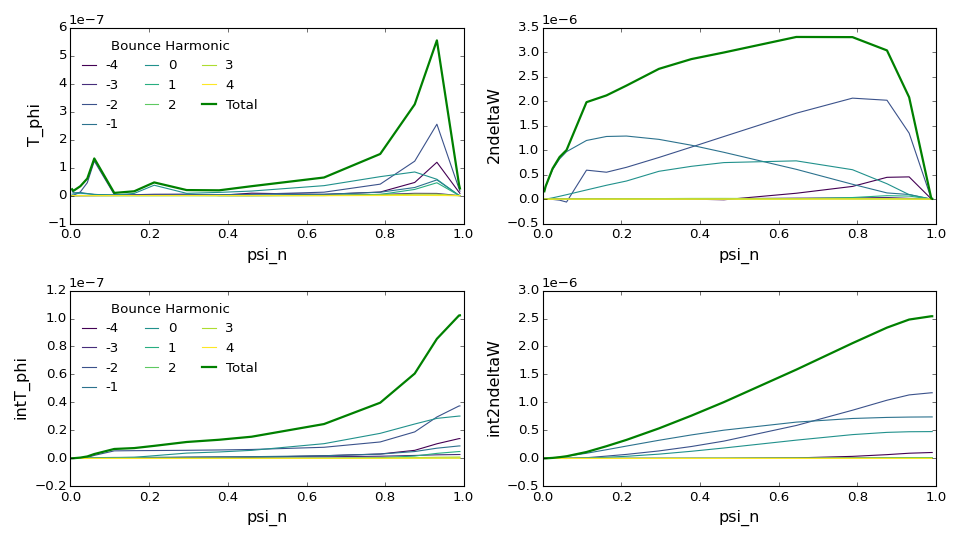

In [31]:
f,ax = data.plt.subplots(2,2)
for key,a in zip(['T_phi', 'intT_phi','2ndeltaW','int2ndeltaW'],ax.T.ravel()):
    for ell in range(-4,5):
        ifgar[key].sel(ell=ell).real.plot(ax=a, label='{:}'.format(ell))
    sm = data.plt.set_linearray(a.lines, cmap='viridis')
    ifgar[key].sum('ell').real.plot(ax=a, color='g', lw=2, label='Total')
for a in ax[:,0]:
    a.legend(ncol=3, handlelength=1, title='Bounce Harmonic')
